## Project description

The coronavirus took the entire world by surprise, changing everyone's daily routine. City dwellers no longer spent their free time outside, going to cafes and malls; more people were at home, reading books. That attracted the attention of startups that rushed to develop new apps for book lovers. <br>

We've been given a database of one of the services competing in this market. It contains data on books, publishers, authors, and customer ratings and reviews of books. This information will be used to generate a value proposition for a new product.

## Description of the data

**books**

Contains data on books:

- `book_id`
- `author_id`
- `title`
- `num_pages` — number of pages
- `publication_date`
- `publisher_id`

**authors**

Contains data on authors:

- `author_id`
- `author`

**publishers**

Contains data on publishers:

- `publisher_id`
- `publisher`

**ratings**

Contains data on user ratings:

- `rating_id`
- `book_id`
- `username` — the name of the user who rated the book
- `rating`

**reviews**

Contains data on customer reviews:

- `review_id`
- `book_id`
- `username` — the name of the user who reviewed the book
    
    
- `text` — the text of the review

### Data diagram
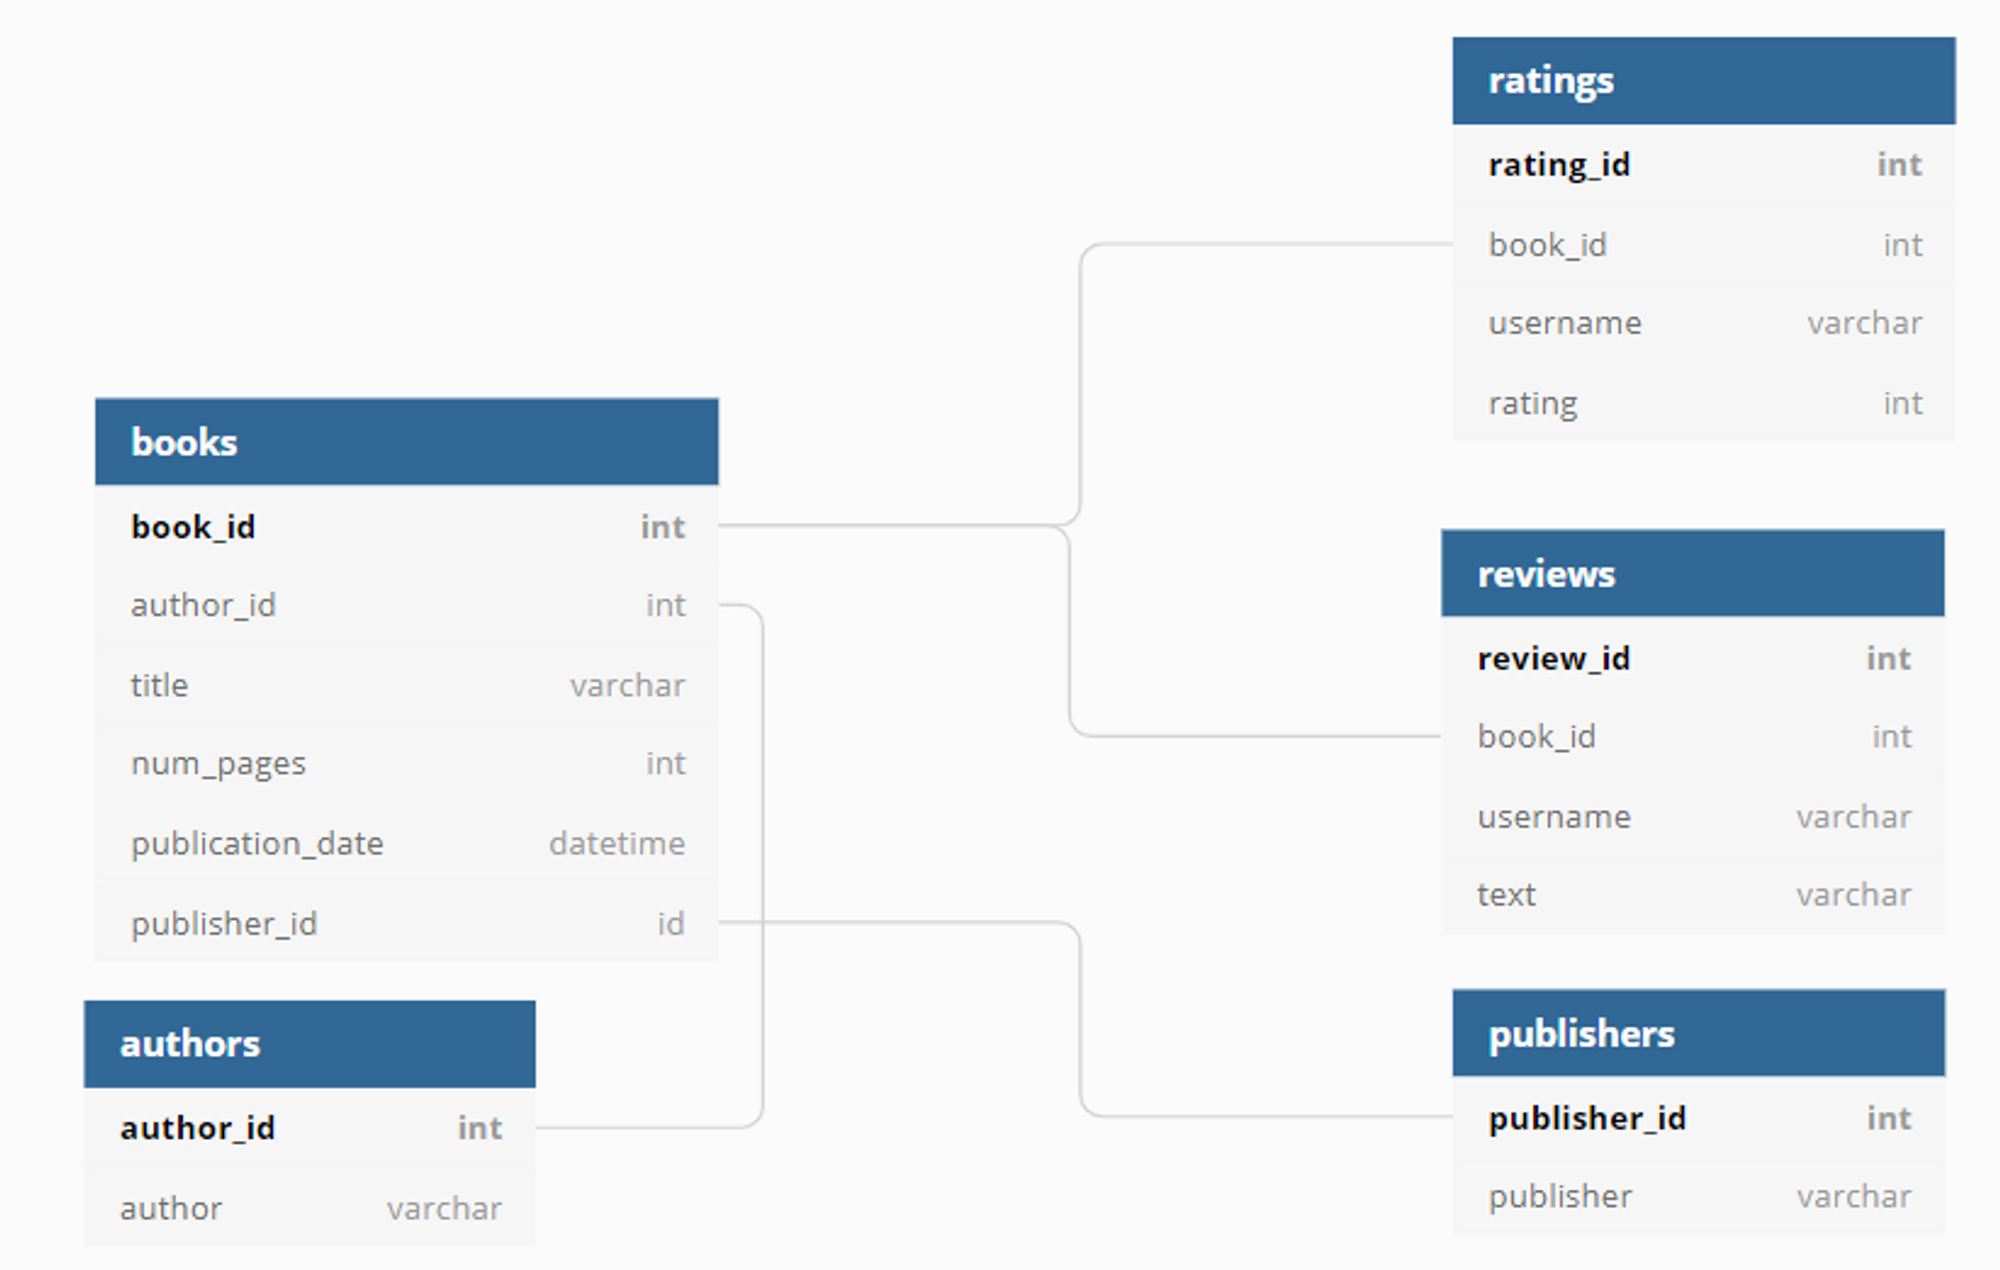

## ## Loading and preprocessing the data

In [1]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine


db_config = {'user': 'practicum_student',         # username
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs', # password
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # connection port
             'db': 'data-analyst-final-project-db'}          # the name of the database

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [2]:
query=f'''SELECT*
      FROM {'books'}
      LIMIT 5
      '''
display(pd.io.sql.read_sql(query, con = engine))

book_id  author_id                                              title  \
0        1        546                                       'Salem's Lot   
1        2        465                 1 000 Places to See Before You Die   
2        3        407  13 Little Blue Envelopes (Little Blue Envelope...   
3        4         82  1491: New Revelations of the Americas Before C...   
4        5        125                                               1776   

   num_pages publication_date  publisher_id  
0        594       2005-11-01            93  
1        992       2003-05-22           336  
2        322       2010-12-21           135  
3        541       2006-10-10           309  
4        386       2006-07-04           268

In [3]:
query=f'''SELECT*
      FROM {'ratings'}
      LIMIT 5
      '''
display(pd.io.sql.read_sql(query, con = engine))

rating_id  book_id       username  rating
0          1        1     ryanfranco       4
1          2        1  grantpatricia       2
2          3        1   brandtandrea       5
3          4        2       lorichen       3
4          5        2    mariokeller       2

In [4]:
query=f'''SELECT*
      FROM {'authors'}
      LIMIT 5
      '''
display(pd.io.sql.read_sql(query, con = engine))

author_id                          author
0          1                      A.S. Byatt
1          2  Aesop/Laura Harris/Laura Gibbs
2          3                 Agatha Christie
3          4                   Alan Brennert
4          5        Alan Moore/David   Lloyd

In [5]:
query=f'''SELECT*
      FROM {'reviews'}
      LIMIT 5
      '''
display(pd.io.sql.read_sql(query, con = engine))

review_id  book_id       username  \
0          1        1   brandtandrea   
1          2        1     ryanfranco   
2          3        2       lorichen   
3          4        3  johnsonamanda   
4          5        3    scotttamara   

                                                text  
0  Mention society tell send professor analysis. ...  
1  Foot glass pretty audience hit themselves. Amo...  
2  Listen treat keep worry. Miss husband tax but ...  
3  Finally month interesting blue could nature cu...  
4  Nation purpose heavy give wait song will. List...

In [6]:
query=f'''SELECT*
      FROM {'publishers'}
      LIMIT 5
      '''
display(pd.io.sql.read_sql(query, con = engine))

publisher_id                          publisher
0             1                                Ace
1             2                           Ace Book
2             3                          Ace Books
3             4                      Ace Hardcover
4             5  Addison Wesley Publishing Company

### Finding the number of books released after January 1, 2000.

In [7]:
query=f'''SELECT COUNT(book_id)
      FROM {'books'}
      WHERE DATE_TRUNC('day', publication_date)>'2000-01-01'
      '''
display(pd.io.sql.read_sql(query, con = engine))

count
0    819

***Conclusions: The number of books released after January 1, 2000 is 819.***

### Finding the number of user reviews and the average rating for each book.


In [8]:
query=f'''SELECT b.title, a.count, c.avg
      FROM books AS b
      LEFT JOIN (SELECT book_id, COUNT(review_id)
      FROM {'reviews'}
      GROUP BY book_id) AS a ON b.book_id=a.book_id
      LEFT JOIN (SELECT book_id, AVG(rating)
      FROM {'ratings'}
      GROUP BY book_id) AS c ON b.book_id=c.book_id 
      '''
display(pd.io.sql.read_sql(query, con = engine))

title  count       avg
0            The Body in the Library (Miss Marple  #3)    2.0  4.500000
1                                            Galápagos    2.0  4.500000
2                             A Tree Grows in Brooklyn    5.0  4.250000
3    Undaunted Courage: The Pioneering First Missio...    2.0  4.000000
4                                          The Prophet    4.0  4.285714
..                                                 ...    ...       ...
995                                Alice in Wonderland    4.0  4.230769
996          A Woman of Substance (Emma Harte Saga #1)    2.0  5.000000
997                                          Christine    3.0  3.428571
998  The Magicians' Guild (Black Magician Trilogy  #1)    2.0  3.500000
999                           The Plot Against America    2.0  3.000000

[1000 rows x 3 columns]

### Let's identify the publisher that has released the greatest number of books with more than 50 pages (this will help you exclude brochures and similar publications from your analysis).

In [9]:
query=f'''SELECT publisher, COUNT(book_id)
      FROM {'books'} AS b
      JOIN  publishers AS p ON b.publisher_id=p.publisher_id
      WHERE num_pages>50
      GROUP BY publisher
      ORDER BY count DESC
      LIMIT 1
      '''
display(pd.io.sql.read_sql(query, con = engine))

publisher  count
0  Penguin Books     42

***Conclusions: The publisher that has released the greatest number of books is Penguin Books. It has released 42 books. ther publishers have fewer books by 10 or more***.

 ### Let's identify the author with the highest average book rating (look only at books with at least 50 ratings).

In [10]:
query=f'''SELECT author, avg
      FROM books AS b
      INNER JOIN (SELECT book_id, count, avg
      FROM (SELECT book_id, COUNT(rating_id), AVG(rating)
      FROM {'ratings'}
      GROUP BY book_id) AS r
      WHERE count>=50) AS n ON n.book_id=b.book_id
      INNER JOIN authors AS a ON a.author_id=b.author_id
      ORDER BY avg DESC
      LIMIT 1
      '''
display(pd.io.sql.read_sql(query, con = engine))

author       avg
0  J.K. Rowling/Mary GrandPré  4.414634

***Conclusions: The author- J.K. Rowling/Mary GrandPré has the highest rating. She has 4.4.The rest of the authors are not far behind her and have ratings from 3.6 to 4.4***.

### Finding the average number of text reviews among users who rated more than 50 books.

In [11]:
query=f'''SELECT ROUND(AVG(f.count))
      FROM (SELECT r.username, COUNT(text)
      FROM(SELECT*
      FROM (SELECT username, COUNT(book_id)
      FROM {'ratings'}
      GROUP BY username) AS a
      WHERE count>50) AS n
      INNER JOIN reviews AS r ON r.username=n.username
      GROUP BY r.username) AS f
      '''
display(pd.io.sql.read_sql(query, con = engine))

round
0   24.0

***Conclusions: The average number of text reviews is 24***.

## Conclusion:
The number of books released after January 1, 2000 is 819.<br>
The publisher that has released the greatest number of books is Penguin Books.<br>
The author- J.K. Rowling/Mary GrandPré has the highest rating.<br>
The average number of text reviews is 24.